In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 7.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex


загрузка наборов данных и обработка

In [ ]:
customers = pd.read_csv("customers.csv")
iris = pd.read_csv("iris.csv")

customers = customers.dropna()
customers = customers.iloc[:, [2,3,4,5,6,7,8,9]]
iris = iris.dropna()

In [ ]:
customers

,Age,Education,YearsEmployed,Income,CardDebt,OtherDebt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [ ]:
col_list = list(customers)
col_list[6], col_list[7] = col_list[7], col_list[6]
customers.loc[:, col_list]
customers = customers[col_list]
customers

,Age,Education,YearsEmployed,Income,CardDebt,OtherDebt,DebtIncomeRatio,Defaulted
0,41,2,6,19,0.124,1.073,6.3,0.0
1,47,1,26,100,4.582,8.218,12.8,0.0
2,33,2,10,57,6.111,5.802,20.9,1.0
3,29,2,4,19,0.681,0.516,6.3,0.0
4,47,1,31,253,9.308,8.908,7.2,0.0
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,4.4,0.0
846,28,2,7,34,0.359,2.021,7.0,0.0
847,25,4,0,18,2.802,3.210,33.4,1.0
848,32,1,12,28,0.116,0.696,2.9,0.0


In [ ]:
iris

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
customers.info

<bound method DataFrame.info of      Age  Education  YearsEmployed  Income  CardDebt  OtherDebt  \
0     41          2              6      19     0.124      1.073   
1     47          1             26     100     4.582      8.218   
2     33          2             10      57     6.111      5.802   
3     29          2              4      19     0.681      0.516   
4     47          1             31     253     9.308      8.908   
..   ...        ...            ...     ...       ...        ...   
844   41          1              7      43     0.694      1.198   
846   28          2              7      34     0.359      2.021   
847   25          4              0      18     2.802      3.210   
848   32          1             12      28     0.116      0.696   
849   52          1             16      64     1.866      3.638   

     DebtIncomeRatio  Defaulted  
0                6.3        0.0  
1               12.8        0.0  
2               20.9        1.0  
3                6.3       

In [ ]:
iris.info

<bound method DataFrame.info of      5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]>

In [ ]:
iris["Iris-setosa"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

преобразование наборов в массив

In [ ]:
X_iris = iris.iloc[:, [0,1,2,3]].values
X_iris

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [ ]:
X_customers = customers.iloc[:, [4,5,6]].values
X_customers

array([[ 0.124,  1.073,  6.3  ],
       [ 4.582,  8.218, 12.8  ],
       [ 6.111,  5.802, 20.9  ],
       ...,
       [ 2.802,  3.21 , 33.4  ],
       [ 0.116,  0.696,  2.9  ],
       [ 1.866,  3.638,  8.6  ]])

In [ ]:
X_customers.shape

(700, 3)

метод для вызова кластеризации k-means

In [ ]:
def kmeans_cluster(data, num_clusters):
    km = KMeans(n_clusters=num_clusters, init='random', n_init=10, max_iter=300,
                random_state=42)
    y_kmeans = km.fit_predict(data)
    return y_kmeans, km

метод для вызова кластеризации kmedoids

In [ ]:
def kmedoids_cluster(data, num_clusters):
    km = KMedoids(n_clusters=num_clusters, max_iter=300,
            random_state=42)
    y_kmedoids = km.fit_predict(data)
    return y_kmedoids, km

фунция вывода ошибки

In [ ]:
def plot_SSE(data, max_clasters, flag = True):
    SSE = []
    for i in range(1, max_clasters):
        if flag:
            _, model = kmeans_cluster(data, i)
        else:
            _, model = kmedoids_cluster(data, i)
        SSE.append(model.inertia_)
    fig = plt.figure(figsize = (7,7))
    plt.plot(range(1,max_clasters),SSE, linewidth=4, markersize=12,marker='o',color = 'red')
    plt.xticks(np.arange(max_clasters))
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()

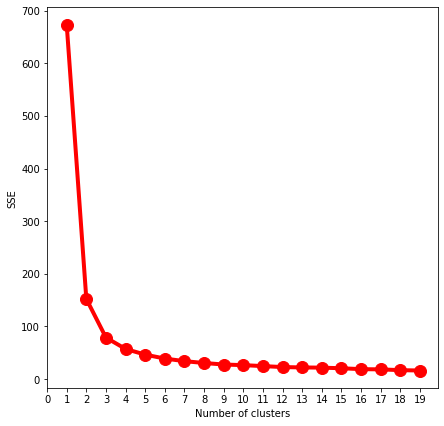

In [ ]:
plot_SSE(X_iris, 20)

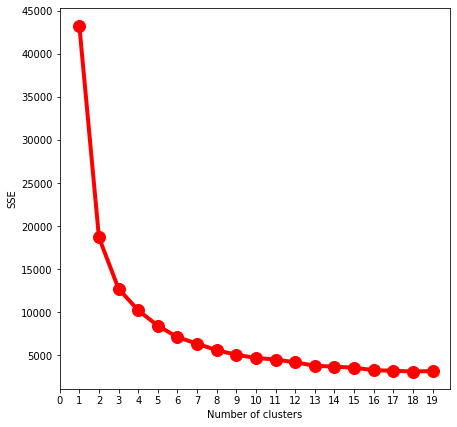

In [ ]:
plot_SSE(X_customers, 20)

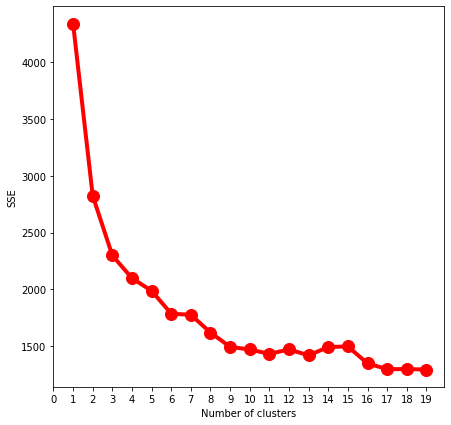

In [ ]:
plot_SSE(X_customers, 20, False)

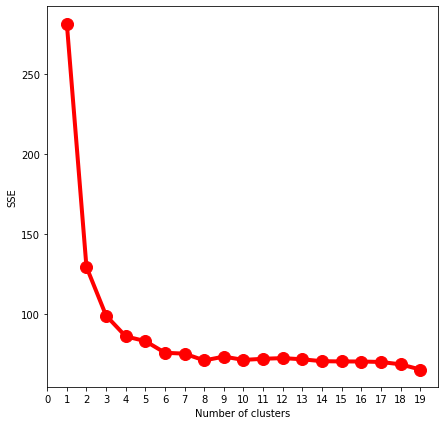

In [ ]:
plot_SSE(X_iris, 20, False)

фунции для вывода графиков в 2d и 3d соответственно



In [38]:
def plot_2d(data, km, y_data, num_clusters):    
    for i in range(num_clusters):
        plt.scatter(data[y_data == i, 0], data[y_data == i, 1], s=100, label='cluster' + str(i))
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, label='centroids')
    plt.legend()

In [ ]:
def plot_3d(data, y_data, num_clusters):
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(num_clusters):
        ax.scatter(data[y_data == i,0],data[y_data == i,1],data[y_data == i,2], s = 40, label = "cluster" + str(i))
    ax.legend()
    plt.show()


функция для внедрения шума в наборы

In [ ]:
from numpy import random
def make_noise(data, percentage):
    ret_data = np.copy(data)
    count_noised = int(ret_data.shape[0] * percentage)
    for i in range(count_noised):
        row = random.randint(ret_data.shape[0])
        for j in range(ret_data.shape[1]):
            noising = min(ret_data[:, j])*2
            ret_data[row][j] += noising

    return ret_data

результат работы k-means в графиках

In [ ]:
y_kmeans_iris, kmeans = kmeans_cluster(X_iris, 3)

In [ ]:
y_kmeans_customers, kmeans_customers = kmeans_cluster(X_customers, 3)

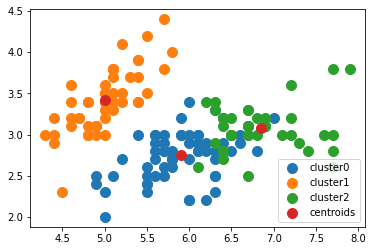

In [39]:
plot_2d(X_iris, kmeans, y_kmeans_iris, 3)

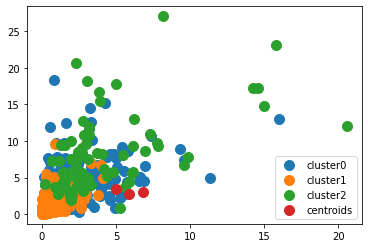

In [41]:
plot_2d(X_customers, kmeans, y_kmeans_customers, 3)

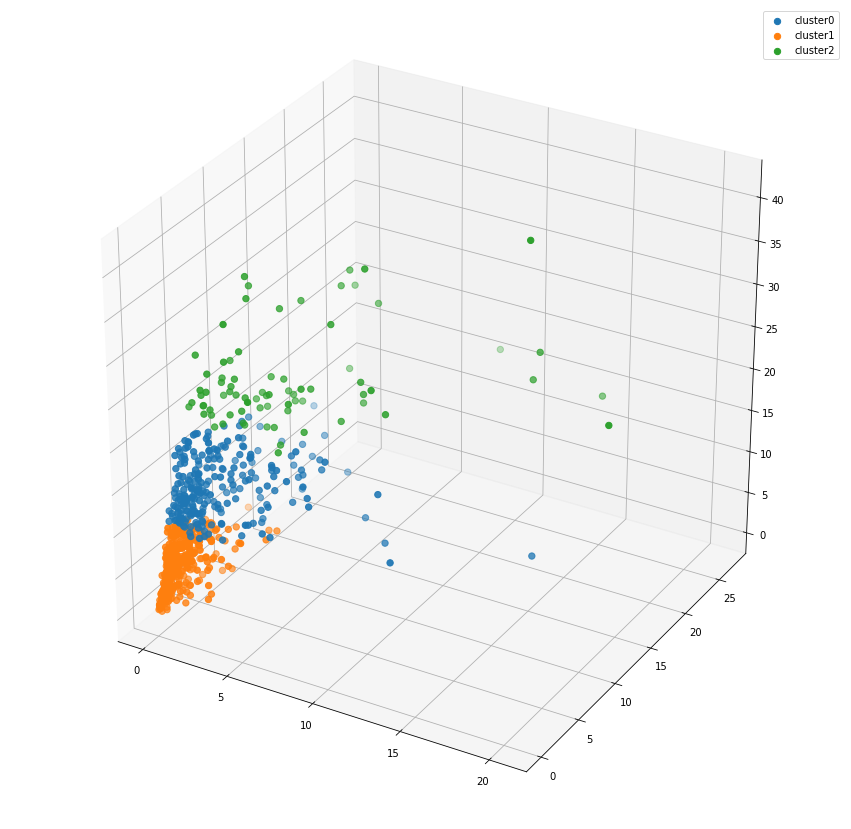

In [29]:
plot_3d(X_customers, y_kmeans_customers, 3)

результат работы kmedoids в графиках

In [28]:
y_kmedoids_iris, kmedoids = kmedoids_cluster(X_iris, 3)
y_kmedoids_customers, kmedoids_customers = kmedoids_cluster(X_customers, 3)

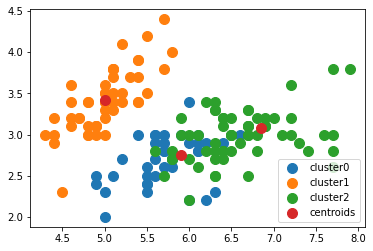

In [42]:
plot_2d(X_iris, kmeans, y_kmedoids_iris, 3)

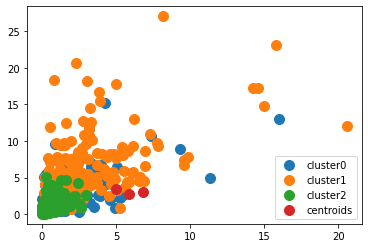

In [43]:
plot_2d(X_customers, kmeans, y_kmedoids_customers, 3)

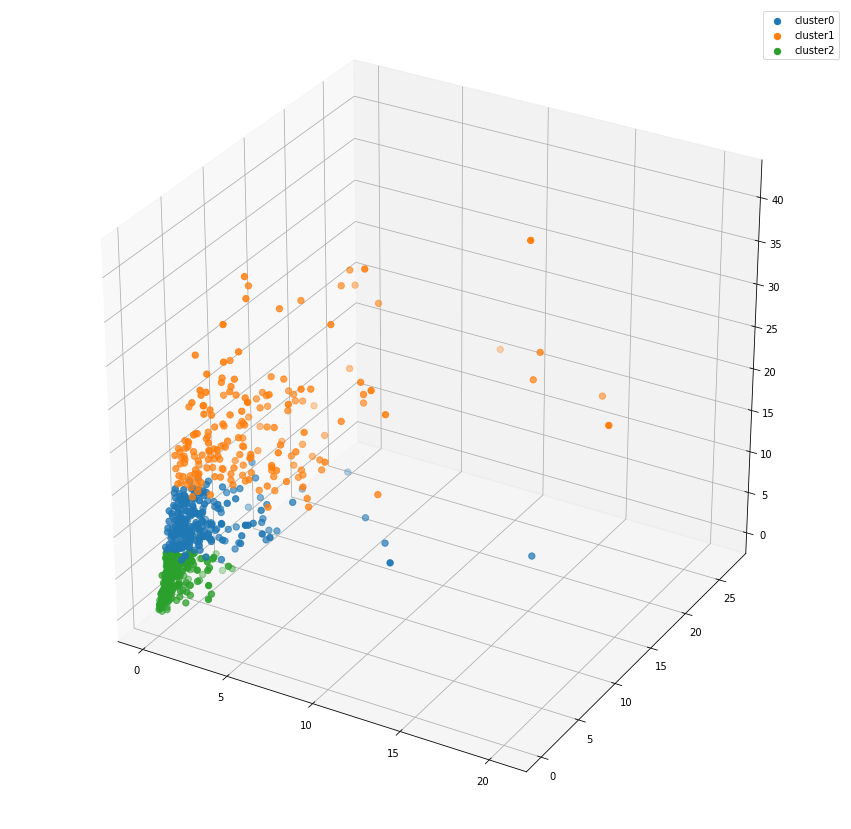

In [45]:
plot_3d(X_customers, y_kmedoids_customers, 3)

внедрения шума в наборы данных

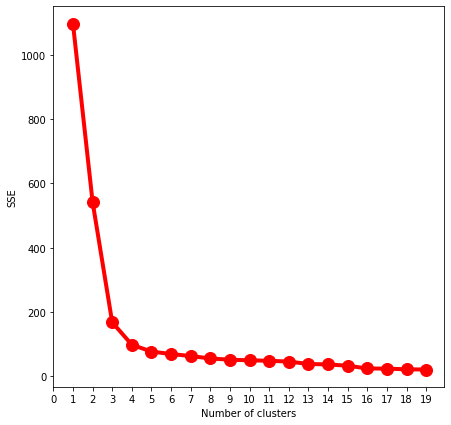

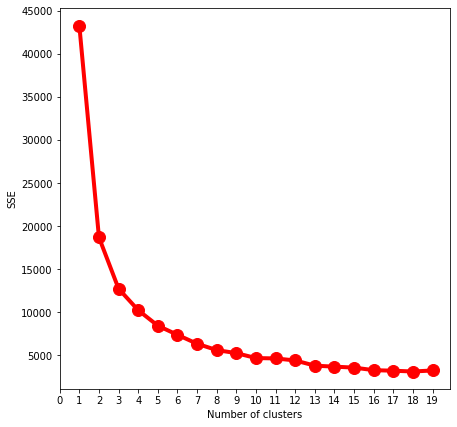

In [46]:
X_iris_noised = make_noise(X_iris, 0.03)
X_customers_noised = make_noise(X_customers, 0.03)
plot_SSE(X_iris_noised, 20)
plot_SSE(X_customers_noised, 20)
y_kmeans_iris_n, km_n = kmeans_cluster(X_iris_noised, 3)
y_kmeans_customers_n, km_customers_n = kmeans_cluster(X_customers_noised, 3)

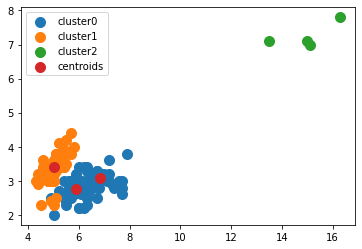

In [47]:
plot_2d(X_iris_noised, kmeans, y_kmeans_iris_n, 3)

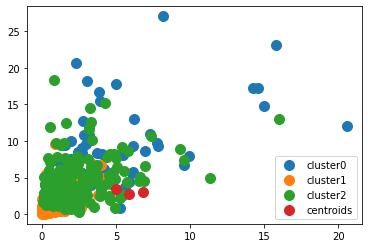

In [48]:
plot_2d(X_customers_noised, kmeans, y_kmeans_customers_n, 3)

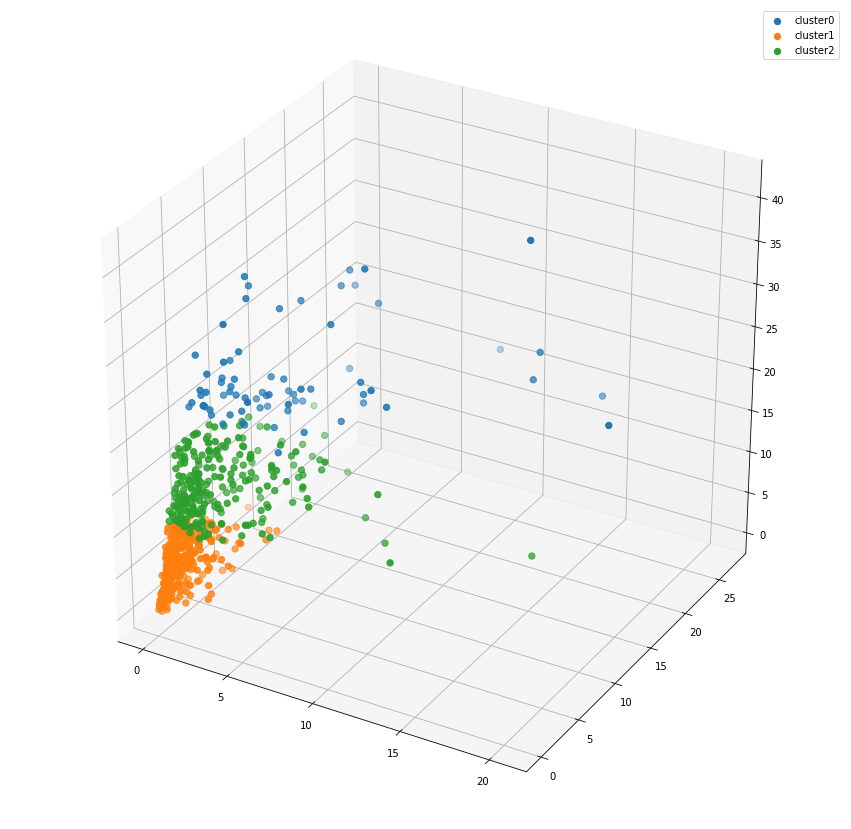

In [50]:
plot_3d(X_customers_noised, y_kmeans_customers_n, 3)